In [16]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', 300)
songs = pd.read_csv('spotify_songs.csv')
all_songs = pd.read_csv('spotify_songs.csv')
# Dropping columns that are not needed
#songs.drop(axis = 1, columns = ['playlist_id', 'track_id', 'track_album_id', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#                                'tempo', 'duration_ms', 'key'], inplace = True)
#songs

In [18]:
'''Cleaning the Dataset: Checking and dropping empty values.'''
# `empty` is used to store a boolean which is gives False for non-empty values and
# True for empty values. The False values are replaced by np.nan values (empty). The np.nan values are 
# dropped with drop.na() leaving only the rows that contain True. The index of `empty` is then 
# used with `loc` to observe the exact values in `songs`. The rows are now dropped as integral missing pieces
# of data like track_name and track_artist have rendered them unsuitable for for further analysis

empty = songs.isna()
empty.replace(False, np.nan, inplace = True)
empty.dropna(axis = 0, how = 'all', inplace = True)
songs.loc[empty.index]
songs.dropna(axis = 0, how = 'any', inplace = True)
songs.head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],2019-08-29,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.594,0.935,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040


In [19]:
'''Filtering The Top 1000 Songs That Appear the Most In The Dataset'''
# This grouping gives a df of how many times a song with a particular artist appears in the dataset.
# It shows that out of the 32833 songs in the dataset ther are only 26229 distinct songs 
top_songs = pd.DataFrame(songs.groupby('track_name')['track_artist'].value_counts())
top_songs.sort_values(by = ['count'], ascending = False, inplace = True)

# This filter helps to sort the database by how many times they appear in the data set, for my analysis it is 3 which gives top 1336 songs
filter = top_songs['count'] >= 3
top_tunes = pd.DataFrame(top_songs[filter])
top_tunes

# To obtain the full data of these top songs from the original dataset, they need to be indexed with the name and artist from the original dataset
# so i'm creating a copy of the original data frame with the index set to these
full_data = songs.set_index(['track_name', 'track_artist'], drop = False)

# The top songs are now indexed here 
top_tunes_full = full_data.loc[top_tunes.index]

# The indexing gives all top 1000 tracks but also gives their duplicates too. In eliminating them, i first sorted
# the df in descending order of the track popularity, this ensured the most popular of the duolicates came first.
# I then dropped duplicates to obtain only a distinct song with the highest popularity
top_tunes_full.sort_values(by = 'track_popularity', ascending = False, inplace = True)
top_tunes_full.drop_duplicates(inplace = True, subset = ['track_name', 'track_artist'])

# I added how many times each song appears and sorted the df by this
# top_tunes_full['appearance'] = top_tunes['count']
top_tunes_full.insert(4, 'appearance', top_tunes['count'])
top_hits = top_tunes_full.sort_values(by = 'appearance', ascending = False)
top_hits

,,track_id,track_name,track_artist,track_popularity,appearance,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_name,track_artist,,,,,,,,,,,,,,,,,,,,,,,
Señorita,Shawn Mendes,0TK2YIli7K1leLovkQiNik,Señorita,Shawn Mendes,93,13,2ZaX1FdZCwchXl1QZiD4O4,Señorita,2019-06-21,2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016...,2DjIfVDXGYDgRxw7IJTKVb,edm,...,0.540,9,-6.039,0,0.0287,0.03700,0.000000,0.0945,0.750,116.947,190960
One Dance,Drake,1zi7xx7UVEFkmKfv06H8x0,One Dance,Drake,83,12,40GMAhriYJRO1rsY4YdrZb,Views,2016-05-06,2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016...,2DjIfVDXGYDgRxw7IJTKVb,edm,...,0.625,1,-5.609,1,0.0536,0.00776,0.001880,0.3290,0.370,103.967,173987
I Don't Care (with Justin Bieber),Ed Sheeran,3HVWdVOQ0ZA45FuZGSfvns,I Don't Care (with Justin Bieber),Ed Sheeran,90,12,5Nux7ozBJ5KJ02QYWwrneR,I Don't Care (with Justin Bieber),2019-05-10,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,0.675,6,-5.041,1,0.0442,0.09120,0.000000,0.0894,0.842,101.956,219947
Dance Monkey,Tones and I,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,12,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
Sweet Home Alabama,Lynyrd Skynyrd,7e89621JPkKaeDSTQ3avtg,Sweet Home Alabama,Lynyrd Skynyrd,81,11,54V1ljNtyzAm053oJqi0SH,Second Helping,1974-04-15,Southern Soul BBQ Mix,3nTS97zUqxJBQeiXNRs963,rap,...,0.605,7,-12.145,1,0.0255,0.18100,0.000331,0.0863,0.886,97.798,283800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A Milli,Lil Wayne,6ScJMrlpiLfZUGtWp4QIVt,A Milli,Lil Wayne,73,3,5BGzOpea6At0Nd7tYtYZOP,Tha Carter III,2008-01-01,Feeling Accomplished,37i9dQZF1DWTDafB3skWPN,r&b,...,0.695,6,-8.636,0,0.2780,0.03870,0.002060,0.1940,0.774,151.468,221840
like that,Bea Miller,6E37j4b44JGpdk297urpKM,like that,Bea Miller,73,3,2rQu10gUgBVYzgsitDZNyU,aurora,2018-02-23,The Sound of Post-Teen Pop,10FCW9lj0NdeoYI5VVvVtY,pop,...,0.441,6,-5.799,0,0.0758,0.18600,0.000000,0.6100,0.389,61.657,185547
SWISH,Tyga,55GiOwtxNajXVbpjjIzMnD,SWISH,Tyga,73,3,4RH1KjpPQxqtOTyV6WikPh,SWISH,2018-07-25,Great Pops,5SO7xYih5w8X5FEpKvU7Rt,latin,...,0.541,11,-5.608,1,0.2210,0.08310,0.000000,0.1180,0.274,105.009,194936


Text(0.5, 1.0, 'Correlation of Track Popularity With Danceability, Energy, Loudness, Valence, and Appearance')

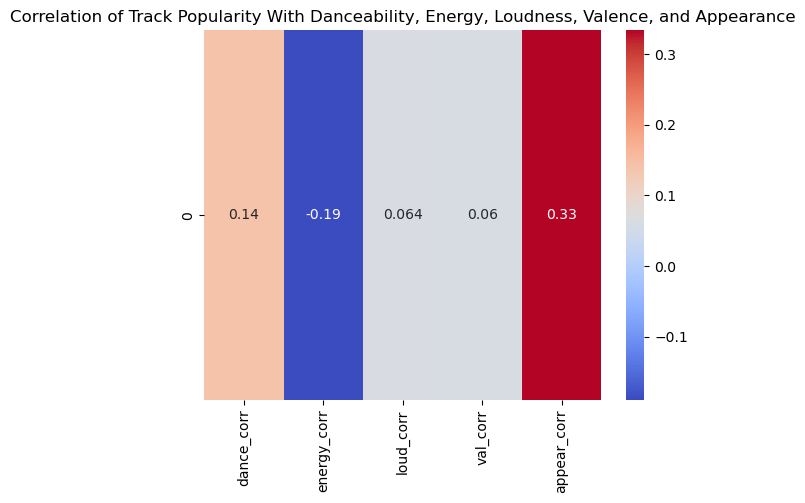

In [20]:
'''Correlation analysis'''
# The correlation between the columns track popularity and, danceability, energy, loudness and valence are calculated
# Pearson's correaltion is used because both data are linear and continuous
dance_corr = top_hits['track_popularity'].corr(top_hits['danceability'])
energy_corr = top_hits['track_popularity'].corr(top_hits['energy'])
loud_corr = top_hits['track_popularity'].corr(top_hits['loudness'])
val_corr = top_hits['track_popularity'].corr(top_hits['valence'])
appear_corr = top_hits['track_popularity'].corr(top_hits['appearance'])


#The values are put into columns of a dataframe and a heatmap is plotted
corr_df = pd.DataFrame()
corr_df['dance_corr'] = [dance_corr]
corr_df['energy_corr'] = [energy_corr]
corr_df['loud_corr'] = [loud_corr]
corr_df['val_corr'] = [val_corr]
corr_df['appear_corr'] = [appear_corr]
sns.heatmap(corr_df, annot = True, cmap = 'coolwarm')
plt.title('Correlation of Track Popularity With Danceability, Energy, Loudness, Valence, and Appearance')


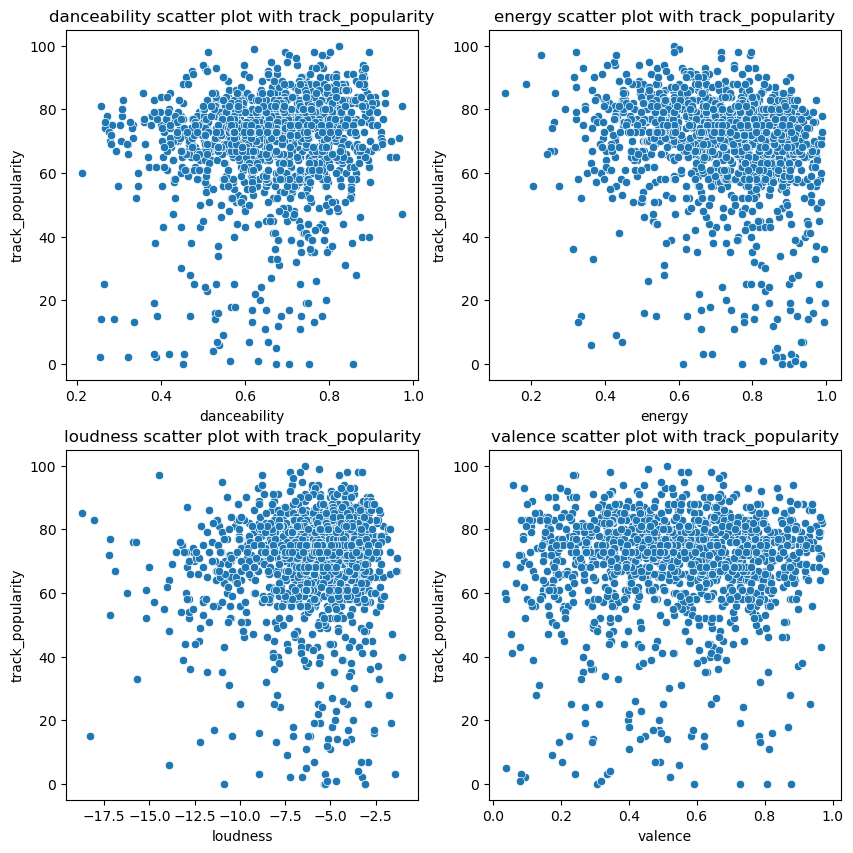

In [21]:
'''Features Vs Popularity Scatter plots'''
# A subplot is created which is able to store 4 charts.
fig, ax = plt.subplots(2,2, figsize = (10,10))

# A function which takes in different arguments that will be used in creating the scatterplot is created. r & c specify the layout of the subplot
def scatter_plot(data, x, y, r, c):
    sns.scatterplot(data, x = x , y = y, ax = ax[r,c])
    ax[r,c].set_title(f'{x} scatter plot with {y}')
    
# The functions are called with the desired arguments passed in order
scatter_plot(top_hits, 'danceability', 'track_popularity', 0, 0)
scatter_plot(top_hits, 'energy', 'track_popularity', 0, 1)
scatter_plot(top_hits, 'loudness', 'track_popularity', 1, 0)
scatter_plot(top_hits, 'valence', 'track_popularity', 1, 1)

In [22]:
'''Part 2a - Top Artists by Popularity'''
# The dataframe is grouped by artists. Lists to store different information are then created
# `unique_artist` is made up of distinct artists only, eliminating the duplicates, it would be integral in the for loop
artists = songs.groupby('track_artist')
artist_name = []
number_of_songs = []
average_popularity = []
unique_artist = songs['track_artist'].unique()

# This for loop appends the artist name first to a list, it then gets a filtered df  from `artists`, a groupby object containing 
 # different artists. The df gotten is one that is of the particular artist only 
# The length of that df's index (the total number of songs) is then appended to a list
# The average popularity is then calculated from that filtered df, formated and appended to a list
for art in unique_artist:
    artist_name.append(art)
    artist = artists.get_group(art)
    number_of_songs.append(len(artist.index))
    average_popularity.append(f'{artist['track_popularity'].mean():.0f}')
    
# The obtained values are then put into the dataframe. Some operations were made to prevent errors
top_artists = pd.DataFrame()
top_artists['artist_name'] = artist_name
top_artists['number_of_songs'] = number_of_songs
top_artists['average_popularity'] = average_popularity
top_artists['average_popularity'] = pd.to_numeric(top_artists['average_popularity'], downcast = 'float')

# To change the results for all proceeding cells, the amount in head() just needs to be changed.
top_ten_artists = top_artists.sort_values(by = 'number_of_songs', ascending = False).head(10)
top_ten_artists.set_index('artist_name', drop = False, inplace = True)
top_ten_artists

,artist_name,number_of_songs,average_popularity
artist_name,,,
Martin Garrix,Martin Garrix,161,47.0
Queen,Queen,136,43.0
The Chainsmokers,The Chainsmokers,123,58.0
David Guetta,David Guetta,110,53.0
Don Omar,Don Omar,102,42.0
Drake,Drake,100,46.0
Dimitri Vegas & Like Mike,Dimitri Vegas & Like Mike,93,43.0
Calvin Harris,Calvin Harris,91,62.0
Hardwell,Hardwell,84,39.0


In [23]:
'''Part 2b Artist Presence Across Playlists'''
# The names of the top ten artists was stored in a list, and different playlists were grouped by their names into a df
artist_names = top_ten_artists.index
playlists = songs.groupby('playlist_genre')
rap = playlists.get_group('rap')
rock = playlists.get_group('rock')
rnb = playlists.get_group('r&b')
pop = playlists.get_group('pop')
latin = playlists.get_group('latin')
edm = playlists.get_group('edm')

# Different list to store information were created, corresponding indexes (e.g all zeros) in each list will later form a row of a df
artist_name = []
rap_appearance = []
rock_appearance = []
rnb_appearance = []
pop_appearance = []
latin_appearance = []
edm_appearance = []

# This for loop first appends the name of the artist into a list, it then creates a filter (a-f) that checks where the artist name is present in 
# the column 'track_artist' of a genre. Looking into what is to be appended first, a df based on the filter is temporarily created e.g rap[a]
# the length of the index (the amount of songs an artist has in that genre) is calculated, and its is appended into an appropriate list. 
# It goes on to do this on all the playlist and for all the artists
for artist in artist_names:
    artist_name.append(artist)
    
    a = rap['track_artist'] == artist
    rap_appearance.append(len(rap[a].index))
    
    b = rock['track_artist'] == artist
    rock_appearance.append(len(rock[b].index))
    
    c = rnb['track_artist'] == artist
    rnb_appearance.append(len(rnb[c].index))
    
    d = pop['track_artist'] == artist
    pop_appearance.append(len(pop[d].index))
   
    e = latin['track_artist'] == artist
    latin_appearance.append(len(latin[e].index))

    f = edm['track_artist'] == artist
    edm_appearance.append(len(edm[f].index))

# The obtained data is then used to create a dataframe
appearance_frequency = pd.DataFrame()
appearance_frequency['artist'] = artist_name
appearance_frequency['rap'] = rap_appearance
appearance_frequency['rock'] = rock_appearance
appearance_frequency['rnb'] = rnb_appearance
appearance_frequency['pop'] = pop_appearance
appearance_frequency['latin'] = latin_appearance
appearance_frequency['edm'] = edm_appearance
appearance_frequency.rename_axis('Artist Appearance in Playlist', inplace = True)
appearance_frequency


,artist,rap,rock,rnb,pop,latin,edm
Artist Appearance in Playlist,,,,,,,
0,Martin Garrix,2,0,1,30,3,125
1,Queen,0,134,0,2,0,0
2,The Chainsmokers,6,0,10,46,12,49
3,David Guetta,2,0,0,44,4,60
4,Don Omar,1,0,0,1,100,0
5,Drake,36,0,33,14,12,5
6,Dimitri Vegas & Like Mike,1,0,0,5,8,79
7,Calvin Harris,4,0,2,42,3,40
8,Hardwell,1,0,0,6,1,76


In [24]:
''' Artist Performance Across Genres '''
# The names of the top ten artists was stored in a list, and different lists were made to store data on how an artist performed in a particular playlst
artist_names = top_ten_artists.index
rap_perf = []
rock_perf = []
rnb_perf = []
pop_perf = []
latin_perf = []
edm_perf = []

# A complete iteration of this for loop would obtain the artist name and their performance in all playlists. The artist name is first obtained
# A filter is then created filter e.g a that checks where the artist name is present in the column 'track_artist' of a genre.
# A df is created with that filter e.g rap[a], and then the mean was then calculated on the column track_popularity
# and appended into a list.
for artist in artist_names:
    artist_name.append(artist)
    
    a = rap['track_artist'] == artist
    rap_value = rap[a]['track_popularity'].mean()
    rap_perf.append(rap_value)
    
    b = rock['track_artist'] == artist
    rock_value = rock[b]['track_popularity'].mean()
    rock_perf.append(rock_value)
    
    c = rnb['track_artist'] == artist
    rnb_value = rnb[c]['track_popularity'].mean()
    rnb_perf.append(rnb_value)
    
    d = pop['track_artist'] == artist
    pop_value = pop[d]['track_popularity'].mean()
    pop_perf.append(rap_value)
    
    e = latin['track_artist'] == artist
    latin_value = latin[e]['track_popularity'].mean()
    latin_perf.append(latin_value)

    f = edm['track_artist'] == artist
    edm_value = edm[f]['track_popularity'].mean()
    edm_perf.append(edm_value)

# The obtained data is then used to create a dataframe, some operations were made to format and prevent errors
app_perf = pd.DataFrame()
app_perf['artist'] = artist_name
app_perf['rap'] = pd.Series(rap_perf)
app_perf['rock'] = pd.Series(rock_perf)
app_perf['rnb'] = pd.Series(rnb_perf)
app_perf['pop'] = pd.Series(pop_perf)
app_perf['latin'] = pd.Series(latin_perf)
app_perf['edm'] = pd.Series(edm_perf)
app_perf.dropna(axis = 0, how = 'all', subset = ['rap', 'rock', 'rnb', 'pop', 'latin'], inplace = True)
app_perf.replace(np.nan, 0, inplace = True)
app_perf = app_perf.round(2)
app_perf.rename_axis('Average Popularity in Playlist', inplace = True)
app_perf

,artist,rap,rock,rnb,pop,latin,edm
Average Popularity in Playlist,,,,,,,
0,Martin Garrix,1.00,0.00,72.00,1.00,76.67,41.66
1,Queen,0.00,43.06,0.00,0.00,0.00,0.00
2,The Chainsmokers,62.67,0.00,57.80,62.67,66.25,51.84
3,David Guetta,66.00,0.00,0.00,66.00,63.00,46.87
4,Don Omar,0.00,0.00,0.00,0.00,42.04,0.00
5,Drake,40.53,0.00,49.58,40.53,51.75,63.20
6,Dimitri Vegas & Like Mike,0.00,0.00,0.00,0.00,75.25,39.51
7,Calvin Harris,50.75,0.00,79.50,50.75,73.67,49.22
8,Hardwell,54.00,0.00,0.00,54.00,29.00,38.72


In [25]:
'''Artist Performance Over Time Data Cleaning'''
# To index only the songs of the top 10 artist with the complete data, they must be filtered in the dataframe using their names
# so my original df `songs` has its index set to track_artist and a list of these artist names `art_id.index` is used to filter them with loc
art_id = app_perf.set_index('artist')
song_id = songs.set_index('track_artist')
top_art_df = song_id.loc[art_id.index]

# The column was converted to date format but there were some errors. For some rows, only the year of release was present.
# I decided to find a way to fix them, to at least find a way to add year and month placeholders (01-01).
# Following conversion, the errors were converted to null values. I found and observed them with a filter 
top_art_df['track_album_release_date'] = pd.to_datetime(top_art_df['track_album_release_date'],  yearfirst = True, errors = 'coerce')
empty_dates = top_art_df['track_album_release_date'].isna() == True
null_dates = top_art_df[empty_dates]

# In fixing dates with incorrect format, their original values need to be obtained in the general df `songs` as they are now null. 
# A very specific multi-index was made in the two df (`top-art_df2`, `gen_indx`) to prevent duplicates and pin-point the exact rows.
# The affected were then filtered as `null` observed and stored in `miss_6`. The full data was then filtered and displayed in `miss_6_full`
top_art_df2 = top_art_df.set_index(['track_name', 'track_album_name', 'playlist_name', 'playlist_subgenre'])
null = top_art_df2['track_album_release_date'].isna() == True
miss_6 = top_art_df2[null]
gen_indx = songs.set_index(['track_name', 'track_album_name', 'playlist_name', 'playlist_subgenre'])
miss_6_full = gen_indx.loc[miss_6.index]

# As the missing information was now obtained, a for loop was created to obtain the filtered date, add the placeholders and append it to a list
new_dates = []
for dates in miss_6_full['track_album_release_date']:
    up_format = f'{dates}-01-01'
    new_dates.append(up_format)

# The missing dates were then filtered using 'empty_dates', a boolean created earlier which would give a list-like iterable of True for null values only
# (the missing dates) and access their rows. The column to be updated was specified. The missing values were replaced with the updated values 
# stored in `new_dates`. Another conversion to date format was then made because of the updated values.
top_art_df.loc[empty_dates,'track_album_release_date'] = new_dates
top_art_df['track_album_release_date'] = pd.to_datetime(top_art_df['track_album_release_date'],  yearfirst = True, errors = 'coerce')
# top_art_df


In [26]:
''' Artist Performance Over Time Analysis '''
# I grouped all artists into a groupby object `all_artists`, the index of my df was used to make the grouping, as I had made the artist names my index
all_artists = top_art_df.groupby(top_art_df.index)

# This lambda function picks an element at a time, it perfoms the attribute `.year`, and replaces original values with the new value.
# This was to be applied to my index, it would pick my date (an index) which was in a bad format from the resampling e.g (2011-12-31) and change it into just (2011)
get_year = lambda x: x.year

# A list was created to store resampled dataframes.
# The for loop was created to create a distinct filter of an artist 'art', this was then resampled by the year ('Y'), two functions `count` and 'mean'
# were then performed on different columns using the `agg` function.
# The lambda function 'get_year' was used to rename the index column, and others were manually done. 'track_name' column was renamed according to the 
# name of the artist. This dataframe was then appended into list.
resampled_dfs = []
for artist in top_art_df.index.unique():
    art = all_artists.get_group(artist)
    df = art.resample('Y', on = 'track_album_release_date').agg({'track_name': 'count', 'track_popularity' : 'mean'})
    df.rename(index = get_year, columns = {'track_name' : f'{artist} Total Songs', 'track_popularity' : 'Avg_Track_Popularity', 
                                           'track_album_release_date' : 'Year'}, inplace = True)
    df.rename_axis('Tracks Release Year', inplace = True)
    df.dropna(axis = 0, how = 'any', inplace = True)
    resampled_dfs.append(df)
    #df.plot()

''' Analyzing the popularity of songs by the top 10 artists over time using the track_album_release_date and track_popularity.
    The Dataframe showing this information has been stored in the list `resampled_dfs`, to observe, an index which corresponds
    to the popularity of the artist can be used to retrieve the artists information e.g `resampled_dfs[0]` will yield the 
    information of the most popular artist and so on. Index 0-9 will show the popularity of the top 10 artists '''

resampled_dfs[5]


,Drake Total Songs,Avg_Track_Popularity
Tracks Release Year,,
2009,3,23.666667
2010,3,69.000000
2011,5,67.600000
2012,1,10.000000
2013,4,15.000000
2015,14,28.857143
2016,26,42.076923
2017,10,50.100000
2018,19,41.631579


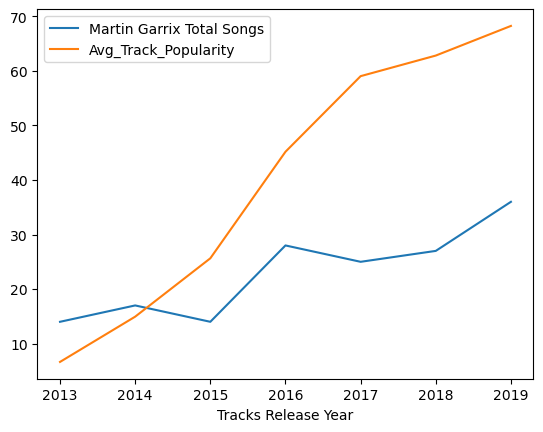

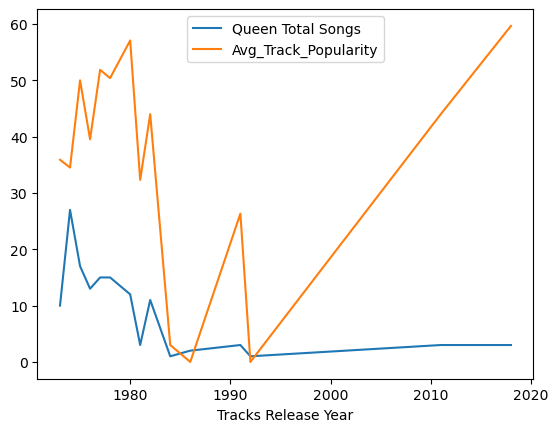

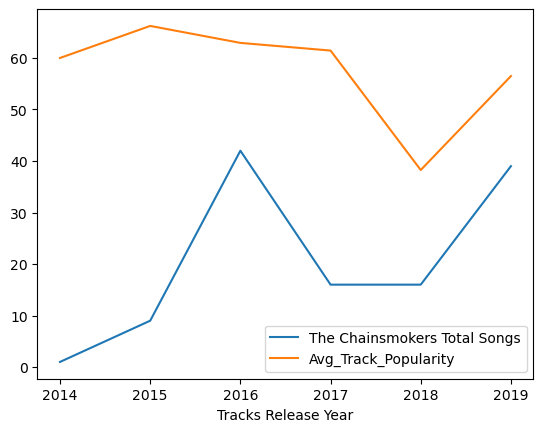

In [27]:
''' Plot of the trend of average popularity over time for the top 3 artists.'''
# The df for the top artists has been stored in a list `resampled_dfs`, the index also corresponds to the popularity of the artist
# so to observe the trend for the top three artists, indexes of 0-2 from the `resampled_dfs` will plottted for. That is what the for loop does
for x in range (0,3):
    resampled_dfs[x].plot()

In [28]:
#- Extra - 
# """End of project, the rest are extras"""End (In real sense)

In [29]:
'''Checking the top songs of each week (W), month (M), year (Y), based on popularity and relase date'''
filter = top_songs['count'] >= 0
top_orin = pd.DataFrame(top_songs[filter])
full_data = songs.set_index(['track_name', 'track_artist'], drop = False)
top_tunes_full = full_data.loc[top_orin.index]
top_tunes_full.sort_values(by = 'track_popularity', ascending = False, inplace = True)
top_tunes_full.drop_duplicates(inplace = True, subset = ['track_name', 'track_artist'])
top_tunes_full['appearance'] = top_orin['count']
top = top_tunes_full.sort_values(by = 'appearance', ascending = False)
top.index = [x for x in range(0, len(top.index))]
top
top['track_album_release_date'] = pd.to_datetime(top['track_album_release_date'], errors = 'coerce')
xy = top.resample('Y', on = 'track_album_release_date').agg({'track_popularity' : 'max'})

xy.index = xy.index.year
xyz = xy.set_index(append = True, drop = False, keys = 'track_popularity')
xyz.dropna(axis= 0, how = 'any', inplace = True)
top.index = top['track_album_release_date']
top.dropna(axis= 0, how = 'any', inplace = True)
top.index = top.index.year
tops = top.set_index(append = True, drop = False, keys = 'track_popularity')
Top_songs_of_each_year = tops.loc[xyz.index]
Top_songs_of_each_year.index = [x for x,y in Top_songs_of_each_year.index]
Top_songs_of_each_year.tail(300)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,appearance
1957,7DJsL4jyXA39GDiHFQYQ0t,Mess Around,Ray Charles,59,0cw6Sv7IwZ87aLPPvNPSd0,"Ray Charles (aka: Hallelujah, I Love Her So)",1957-01-01,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,1S7BckuYIkEazeNKOSM0uA,r&b,urban contemporary,...,8,-2.981,1,0.0640,0.437000,0.000000,0.0560,0.906,148.808,160227,1
1958,4gphxUgq0JSFv2BCLhNDiE,Jailhouse Rock,Elvis Presley,73,0C3t1htEDTFKcg7F2rNbek,Elvis' Golden Records,1958-03-21,Blues Rock,56dbowk1V5ycS5jW7DSvi5,rock,classic rock,...,10,-9.538,0,0.0755,0.410000,0.000002,0.0715,0.915,167.396,146480,1
1961,02K5IV55wIgNNARk3UA95E,Paloma Negra,Chavela Vargas,47,2Z3BXtXY75OOYcJljBozCb,Chavela Vargas,1961-10-26,Urban contemporary,1ZlL3IQS8eB0s0RMxz02yD,r&b,urban contemporary,...,2,-14.145,1,0.0418,0.859000,0.000003,0.0908,0.433,151.223,198760,1
1963,3KiexfmhxHvG5IgAElmTkd,I Saw Her Standing There - Remastered 2009,The Beatles,71,3KzAvEXcqJKBF97HrXwlgf,Please Please Me (Remastered),1963-03-22,Rock Classics,37i9dQZF1DWXRqgorJj26U,rock,classic rock,...,4,-9.835,1,0.0361,0.270000,0.000000,0.0665,0.971,160.109,173947,1
1964,5y788ya4NvwhBznoDIcXwK,The Sound of Silence - Acoustic Version,Simon & Garfunkel,74,5pnJrocLlZ3FWEbcr2PTz0,"Wednesday Morning, 3 A.M.",1964-10-19,Permanent wave,0tOy7ZY4E2PadXIyj8zU43,rock,permanent wave,...,6,-13.551,1,0.0301,0.837000,0.000000,0.1070,0.328,106.761,185413,1
1965,2PzU4IB8Dr6mxV3lHuaG34,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,76,2Q5MwpTmtjscaS34mJFXQQ,Out Of Our Heads,1965-07-30,House Of The Rising Sun,1bMYfBHYBCRHY5LGkjlpSy,rock,album rock,...,2,-7.890,1,0.0338,0.038300,0.031700,0.1280,0.931,136.302,222813,3
1966,1qRA5BS78u3gME0loMl9AA,For What It's Worth,Buffalo Springfield,73,3PkdGRruLnJ9zCtANiDrpB,Buffalo Springfield,1966-12-05,Classic Rock Legends,3NcxM1LJJdua8AcRxtijNY,rock,classic rock,...,2,-10.164,1,0.0497,0.406000,0.020900,0.1010,0.822,98.883,153693,3
1967,6FRwDxXsvSasw0y2eDArsz,Sunshine Of Your Love,Cream,73,6fRqzJT070Kp9RWlSXmKcY,Disraeli Gears,1967-11-02,Southern Rock/Classic Rock,0QUlq0LMDVXSBtbyYLTyZh,rock,classic rock,...,2,-12.590,1,0.0384,0.475000,0.000066,0.1180,0.784,115.078,250000,7
1968,2aoo2jlRnM3A0NyLQqMN2f,All Along the Watchtower,Jimi Hendrix,76,5z090LQztiqh13wYspQvKQ,Electric Ladyland,1968-10-25,House Of The Rising Sun,1bMYfBHYBCRHY5LGkjlpSy,rock,album rock,...,8,-6.237,1,0.0624,0.002550,0.000057,0.0842,0.564,113.253,240800,3
1969,4BP3uh0hFLFRb5cjsgLqDh,Fortunate Son,Creedence Clearwater Revival,80,31q47gQszFt0CddSyMksgO,Willy And The Poor Boys,1969-11-02,Classic Rock Workout,37i9dQZF1DWYNSm3Z3MxiM,rock,classic rock,...,0,-7.516,1,0.0374,0.201000,0.008060,0.1520,0.663,132.770,140773,8


In [30]:
# Optional - Checking the top artists of each week (W), month (M), year (Y), based on mean popularity and relase date
#jams = top.groupby('track_artist')
#TS = jams.get_group('Taylor Swift')
#xy = TS.resample('Y', on = 'track_album_release_date').agg({'track_popularity' : 'max'})
#xy
# print('hello')

In [31]:
'''Checking the top artist of each week (W), month (M), year (Y), based on average popularity in that timeframe'''

top['track_album_release_date'] = top.index
top_artists = top.set_index(['track_artist', 'track_album_release_date'])
artist_year_index = [top_artists.value_counts]
art_year = top_artists.groupby(top_artists.index)
top_artist_year = pd.DataFrame()
dupl_ind = pd.DataFrame(top_artists.index)
no_dupl_ind = dupl_ind.drop_duplicates()
ind = -1
for artyear in no_dupl_ind[0]:
    ind += 1
    art_year_grp = art_year.get_group(artyear)
    top_artist_year.loc[ind, 'artist/year'] = [f'{artyear}']
    top_artist_year.loc[ind, 'average score'] = art_year_grp['track_popularity'].mean()
    top_artist_year.loc[ind, 'total songs'] = art_year_grp['track_name'].nunique()
    #if ind == 24740:
        #break
art_year_grp
top_artist_year

,artist/year,average score,total songs
0,"[('Shawn Mendes', 2019)]",81.333333,3.0
1,"[('Tones and I', 2019)]",76.000000,7.0
2,"[('Drake', 2016)]",57.285714,7.0
3,"[('Ed Sheeran', 2019)]",69.285714,14.0
4,"[('Bon Jovi', 1986)]",48.500000,2.0
...,...,...,...
15676,"[('Pimp C', 2003)]",49.000000,1.0
15677,"[('Millennium Jazz Music', 2017)]",49.000000,1.0
15678,"[('DORJ', 2019)]",49.000000,1.0
15679,"[('SNBRN', 2015)]",49.000000,1.0


In [32]:
for x in top_artist_year.index:
    yr = top_artist_year.loc[x, f'{top_artist_year.columns[0]}'][0][-5:-1]
    top_artist_year.loc[x,'Year'] = yr
top_artist_year

,artist/year,average score,total songs,Year
0,"[('Shawn Mendes', 2019)]",81.333333,3.0,2019
1,"[('Tones and I', 2019)]",76.000000,7.0,2019
2,"[('Drake', 2016)]",57.285714,7.0,2016
3,"[('Ed Sheeran', 2019)]",69.285714,14.0,2019
4,"[('Bon Jovi', 1986)]",48.500000,2.0,1986
...,...,...,...,...
15676,"[('Pimp C', 2003)]",49.000000,1.0,2003
15677,"[('Millennium Jazz Music', 2017)]",49.000000,1.0,2017
15678,"[('DORJ', 2019)]",49.000000,1.0,2019
15679,"[('SNBRN', 2015)]",49.000000,1.0,2015


In [44]:
top_artist_year.sort_values(by = ['Year', 'average score', 'total songs'], ascending = False, inplace = True)
drop_cond = (top_artist_year['total songs'] <= 4) | (top_artist_year['average score'] <= 50.000000) 
# The sign - infers the inverse of
major_art = top_artist_year[-drop_cond]
#top_artist_year.drop(index = top_artist_year[drop_cond].index)
year_art = major_art.groupby('Year')
year_grp = year_art.get_group('2014').head(1)
year_grp
# for x in year_grp.index:
#     print(x)

,artist/year,average score,total songs,Year
908,"[('Coldplay', 2014)]",55.5625,16.0,2014


In [34]:
# Add all the top artists from above years into a df
best_artistz = pd.DataFrame()
for x in pd.DataFrame(major_art['Year'].value_counts()).index:
    year_art = major_art.groupby('Year')
        # The reason for this is because it is sorted in descending order, so the first song will be what we will be needing
    year_grp = year_art.get_group(x).head(1)
    c = [*year_grp.index]
    # Future note: the above cannot serve as an indexer by itself
    best_artistz.loc[x, 'artist/year'] = year_grp.loc[c[0], 'artist/year']
    best_artistz.loc[x, 'average score'] = year_grp.loc[c[0], 'average score']
    best_artistz.loc[x, 'total songs'] = year_grp.loc[c[0], 'total songs']
best_artistz.sort_index()

,artist/year,average score,total songs
1969,"[('Led Zeppelin', 1969)]",63.666667,6.0
1970,"[('George Harrison', 1970)]",59.333333,6.0
1971,"[('Led Zeppelin', 1971)]",54.714286,7.0
1973,"[('Elton John', 1973)]",52.400000,5.0
1975,"[('Queen', 1975)]",50.384615,13.0
1977,"[('Fleetwood Mac', 1977)]",50.625000,8.0
1978,"[('The Cars', 1978)]",58.800000,5.0
1980,"[('Queen', 1980)]",52.900000,10.0
1987,"[('Def Leppard', 1987)]",59.333333,6.0
1988,"[('N.W.A.', 1988)]",61.600000,5.0


In [35]:
# # Extra -
# # Working on the best perfroming albums in terms of appearance (total) and total average score in year of release
# # Can the length of songs in that album be used to judge if it can be regarded as an album? 
# all_songs = pd.read_csv('spotify_songs.csv')
# sungs = all_songs.drop(axis = 1, columns = ['playlist_id', 'track_id', 'track_album_id', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#                                 'tempo', 'duration_ms', 'key'])
# sungs[['track_album_name', 'track_artist']].value_counts().sample(5)

In [36]:
# Correlation of top_songs by Subgenre
playlists = top_hits.groupby('playlist_genre')
rap = playlists.get_group('rap')
rock = playlists.get_group('rock')
rnb = playlists.get_group('r&b')
pop = playlists.get_group('pop')
latin = playlists.get_group('latin')
edm = playlists.get_group('edm')

play_list = [rap, rock, rnb, pop, latin, edm]

#sub_genre_df = {y : [x] for x, y in enumerate(edm['playlist_subgenre'].value_counts().index) }
#sub_genre_df
rap_sub = {y : x for x, y in enumerate(rap['playlist_subgenre'].unique())}
rock_sub = {y : x for x, y in enumerate(rock['playlist_subgenre'].unique())}
rnb_sub = {y : x for x, y in enumerate(rnb['playlist_subgenre'].unique())}
pop_sub = {y : x for x, y in enumerate(pop['playlist_subgenre'].unique())}
latin_sub = {y : x for x, y in enumerate(latin['playlist_subgenre'].unique())}
edm_sub = {y : x for x, y in enumerate(edm['playlist_subgenre'].unique())}

play_sub = [rap_sub, rock_sub, rnb_sub, pop_sub, latin_sub, edm_sub]

#for y in rap['playlist_subgenre'].unique():
#    okan = rap.groupby('playlist_subgenre')
#    aa = okan.get_group(y)
#    rap_sub[y] = aa 
    
#rap['playlist_subgenre'].unique()
#s = rap_sub['gangster rap']
#s

# Probably the craziest for loop i've ever written
# the first for-loop accesses genres as dfs
# the 2nd, a dictionary
# the 3rd, corresponds to the keys of the dictionary in the second

for genre in play_list:
    for z in play_sub:
        for y in genre['playlist_subgenre'].unique():
            one = genre.groupby('playlist_subgenre')
            df = one.get_group(y)
            z[y] = df 
            
#rock['playlist_subgenre'].value_counts()
#rock_sub['permanent wave']
#play_list = top_hits['playlist_genre'].unique


rap_southern_h_h = rap_sub['southern hip hop']
rap_hip_hop = rap_sub['hip hop']
rap_gangster_rap = rap_sub['gangster rap']
rap_trap = rap_sub['trap']

#latin_sub['latin pop']
#rap_gangster_rap
#latin['playlist_subgenre'].unique()

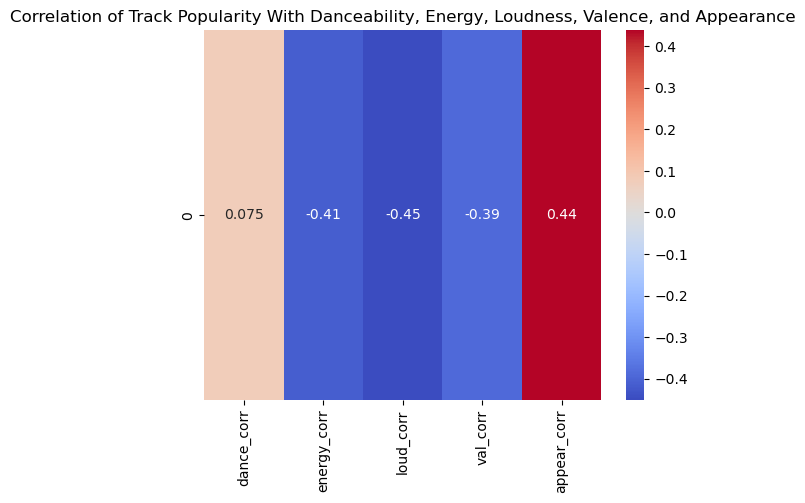

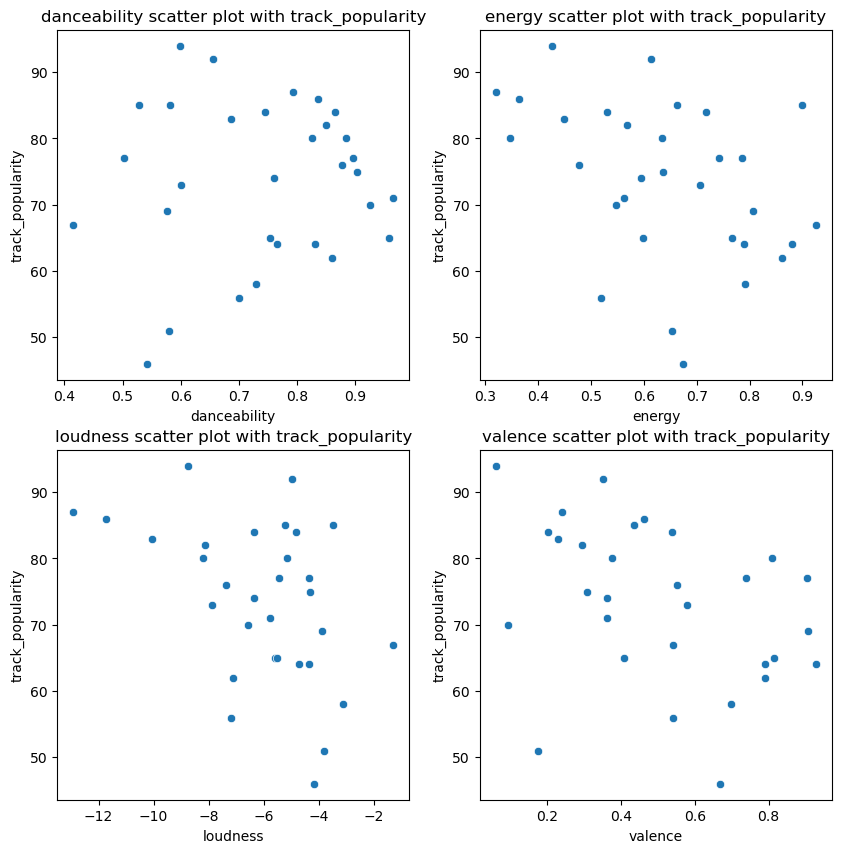

In [39]:
#For the the subgenre rap_hip_hop above
dance_corr = rap_hip_hop['track_popularity'].corr(rap_hip_hop['danceability'])
energy_corr = rap_hip_hop['track_popularity'].corr(rap_hip_hop['energy'])
loud_corr = rap_hip_hop['track_popularity'].corr(rap_hip_hop['loudness'])
val_corr = rap_hip_hop['track_popularity'].corr(rap_hip_hop['valence'])
appear_corr = rap_hip_hop['track_popularity'].corr(rap_hip_hop['appearance'])


#The values are put into columns of a dataframe and a heatmap is plotted
corr_df = pd.DataFrame()
corr_df['dance_corr'] = [dance_corr]
corr_df['energy_corr'] = [energy_corr]
corr_df['loud_corr'] = [loud_corr]
corr_df['val_corr'] = [val_corr]
corr_df['appear_corr'] = [appear_corr]
sns.heatmap(corr_df, annot = True, cmap = 'coolwarm')
plt.title('Correlation of Track Popularity With Danceability, Energy, Loudness, Valence, and Appearance')


fig, ax = plt.subplots(2,2, figsize = (10,10))
def scatter_plot(data, x, y, r, c):
    sns.scatterplot(data, x = x , y = y, ax = ax[r,c])
    ax[r,c].set_title(f'{x} scatter plot with {y}')
    
# The functions are called with the desired arguments passed in order
scatter_plot(rap_hip_hop, 'danceability', 'track_popularity', 0, 0)
scatter_plot(rap_hip_hop, 'energy', 'track_popularity', 0, 1)
scatter_plot(rap_hip_hop, 'loudness', 'track_popularity', 1, 0)
scatter_plot(rap_hip_hop, 'valence', 'track_popularity', 1, 1)


In [40]:
# - Extra - This will be found in the 2.0 project # # finding songs similar to my most played songs : The values will be correlated to all other values of other songs, the song that has the 
# # highest sum will be the most similar to the song
# all_songs.drop(axis = 1, columns = ['playlist_id', 'track_id', 'track_album_id', 'mode', 'duration_ms', 'key', 'instrumentalness', 'loudness', 'track_album_name', 'track_album_release_date', 'playlist_name'], inplace = True)
# filtt = all_songs['track_artist'] == 'BTS'
# all_songs[filtt]

In [41]:
# # Extra - This will be found in the 2.0 project 
# my_song = (all_songs['track_name'] == 'Jamais Vu') & (all_songs['track_artist'] == 'BTS')
# all_songs[my_song]

In [42]:

# song_values = {'dance' : 0.608, 'energy' : 0.470, 'speechiness' : 0.0428,'acousticness' : 0.2260,  'liveness' : 0.0963, 'valence' : 0.241, 'tempo' : 81.000 }
# song_df = pd.DataFrame(song_values, index = [1])
# audio_char_list = ['dance', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
# dance_corr = []
# energy = []
# speechiness = []
# acousticness = []
# liveness = []
# valence = []	
# tempo = []

# #for a in audio_char_list
# #    for b in all_songs[a]:
# #        song_values[''].corr()b

# #all_songs['tempo'].corr(song_df['valence'])
# song_df.corr()

In [43]:
#Extra - Optional checking songs that are remixes
#xld = songs['track_name'].str.contains('feat', 'featuring', na = False)
#xld = songs['track_name'].str.contains('Queen', na = False)
#songs[xld]